# DS 211 Numerical Optimization (AUG 2022)
## **Problem Set 1**
**Dealine to submit- 23-Sept-2022**



## **Question : 1** 


 **Linear Least Squares** **[5 points]**


The simplest model to predict the spread of infectious diseases is the SIR model. This model is a set of ordinary differential equations that describe the evolution of the number of susceptible (S(t)), infected (I(t)) and recovered/removed (R(t)) populations in a closed system. The equations are

$\frac{dS}{dt} = \frac {−βIS} {N} $, (1)

$\frac{dI}{dt} =\frac {βIS} {N} −γI$, (2)

$\frac{dR}{dt} = γI$, (3)

where $N = S(t)+I(t)+R(t)$. The basic reproduction number $R_0 = β/γ$ is defined to quantify the new infections that one infected person causes and is considered as a magic number to identify if an infectious disease is under control. For example, if $R_0 > 1$, the disease has an exponential growth whereas if $R_0 < 1$, the disease is under control and the infectious population will eventually go to zero. At peak $R_0$ will cross 1.
As with simple models, there exist analytical solutions to the SIR model. One form of the solution is given as

$S(t) = S(0) exp(−χ(t))$ , (4)

$I(t) = N − S(t) − R(t)$ , (5)

$R(t) = R(0) + ρχ(t)$ , (6)

$χ(t) = \frac {β} {N} \int_{0}^{t}I(t^*) dt^*$. (7)


For this assignment, we will consider a time unit of days, total population of India as 130 crores and the time horizon of interest as March 23, 2020 to Oct 15, 2020. Removed is a sum of recovered and deceased, i.e., the population that will not get infected again. Data in CSV form for state-wise-daily is available at
https://data.covid19india.org/csv/latest/state_wise_daily.csv

1. Download the state wise daily data of infected, recovered and deceased from the covid19india website. The data gives daily new infections, recovery and deceased. Use Pandas and create time-series of all India $I(t), S(t)$ and $R(t)$. Plot these time- series. Hint: Apply yourself and see what $I(t)$ means and what the data provides.
2. Formulate the problem of estimating $γ$ and $β$ as a linear least squares problem.
3. Form the Jacobian matrix and calculate its rank and condition number.
4. Form the coefficient matrix and calculate its condition number. Find the relation between this condition number and condition number of the Jacobian.
5. Code the cholesky factorization approach to solve the linear least squares problem.
6. Apply your code and estimate $β, γ$ and $R_0$.
7. Use scipy.optimize and estimate $β, γ$ and $R_0$.
8. State your observations in the above two items and give reasons.
9. Estimate $R_0(t)$ as a function of time by utilizing data until t to estimate the different parameters. Plot $R_0(t)$. 
10. Based on the above analyse the state of the pandemic in India. Has the peak passed as on Oct 2020?

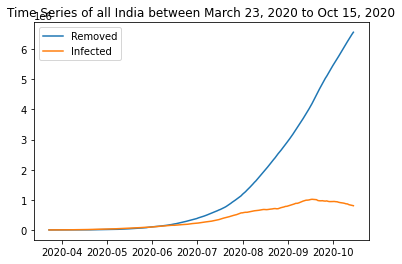

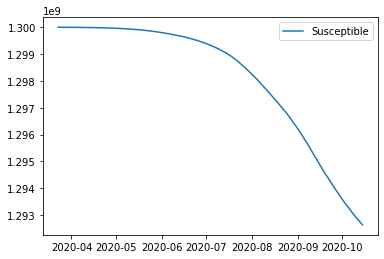

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

date_r=pd.date_range(start='23/03/2020',end='15/10/2020',freq='D')
#print(date_r)
confirm=np.empty((207))
recover=np.empty((207))
decease=np.empty((207))
data=pd.read_csv('https://data.covid19india.org/csv/latest/state_wise_daily.csv')
date=data.loc[:,'Date']
TT=data.loc[:,'TT']
#TT
#print(data)
N=130*10**7
# separating confirmed,recovered,deceased case putting in a array
i=0
j=27
while j<=645:
  if i==0:
    confirm[i] = TT[j]
    recover[i] = TT[j+1]
    decease[i] = TT[j+2]
  else:
     confirm[i] = TT[j]
     recover[i] = TT[j+1]
     decease[i] = TT[j+2]

  j=j+3
  i=i+1
#print(confirm)
#Constructing R(t),I(t),S(t)
R=np.empty((207))
I=np.empty((207))
S=np.empty((207))
R = np.cumsum(recover)+np.cumsum(decease)
I = np.cumsum(confirm)-R
S=N-I-R
#plotting of S, I, R vs t(day)
plt.title('Time Series of all India between March 23, 2020 to Oct 15, 2020')
plt.plot(date_r,R,label='Removed')
plt.plot(date_r,I,label='Infected')

plt.legend()
plt.show()
plt.plot(date_r,S,label='Susceptible')
plt.legend()
plt.show()

Formulating the equation $AX=B$,that is
$A=\begin{bmatrix}
-\frac{IS}{N} &0\\
\frac{IS}{N}& -I\\
0 & I
\end{bmatrix}$
and $X=\begin{bmatrix}
\beta\\
\gamma
\end{bmatrix}$, $B=\begin{bmatrix}
\frac{dS}{dt}\\
\frac{dI}{dt}\\
\frac{dR}{dt}
\end{bmatrix}$.

In [49]:
dR=np.gradient(R) #dR/dt
dS=np.gradient(S) #dS/dt
dI=np.gradient(I) #dI/dt
b=np.row_stack((np.transpose([dS]),np.transpose([dI]),np.transpose([dR])))
x=np.transpose([[1.0,1.0]])

a1=np.transpose([(-1)*np.divide(I*S,N),np.zeros((207))])
a2=np.transpose([np.divide(I*S,N),(-1)*I])
a3=np.transpose([np.zeros((207)),I])
A=np.row_stack((a1,a2,a3))





Question 3,4
For $f(X)=AX-B$, we have jacobian $\nabla f(X)=A$

In [50]:
#Jacobian_matrix
J=A
CJ=np.linalg.cond(J) #Condition number of Jacobian
rank=np.linalg.matrix_rank(J) #rank of Jacobian
print("Jacobian matrix has rank:",rank)
print("Condition Number of Jacobian:",CJ)

K=np.linalg.cond(A) #condition number of the coefficient matrix A
print("Condition Number of Coeffecient Matrix A:",K)

if CJ==K:
  print("The Jacobian and Coefficient matrix are of same rank!")

Jacobian matrix has rank: 2
Condition Number of Jacobian: 1.732070716722878
Condition Number of Coeffecient Matrix A: 1.732070716722878
The Jacobian and Coefficient matrix are of same rank!


Cholesky Factorization 

In [51]:

D=np.dot(np.transpose(A),A) #D = A^T*A
n=(np.shape(B)[0])
L=np.zeros((2,2))
for i in range(0,n):
  j=0
  while(j<=i):
    sum=0.0
    k=0
    while(k<j):
      sum+=L[i,k]*L[j,k]
      k+=1
    if i==j:
      L[i,j]=np.sqrt(D[i,i]-sum)
    else:
      L[i,j]=(1.0/L[j,j])*(D[i,j]-sum)
    j+=1

x=np.matmul(np.linalg.inv(np.matmul(L,np.transpose(L))),np.matmul(np.transpose(A),b)) #solving A^t.Ax = A^t.b
print("beta = ",x[0,0])
print("gamma = ",x[1,0])
print("R0 = ",x[0,0]/x[1,0])

beta =  0.09167505183592117
gamma =  0.08581237141119386
R0 =  1.068319757726245


Using Built in function

In [52]:

from scipy import optimize
b=b.reshape((np.shape(b)[0],)) #reshaping b to (621,) as it has to conform to the input parameters of lsq_linear
res=scipy.optimize.lsq_linear(A,b)
print("beta = ",x[0,0])
print("gamma = ",x[1,0])
print("R0 = ",x[0,0]/x[1,0])

beta =  0.09167505183592117
gamma =  0.08581237141119386
R0 =  1.068319757726245


Here both the result from Cholesky factorization with Linear least square and from built in function gives same result. 

Plotting $R_0(t)$

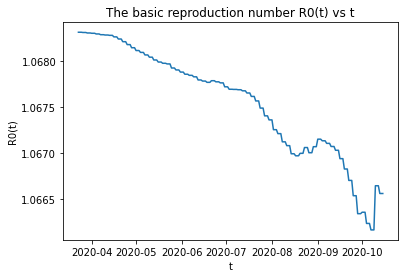

In [53]:


n=207 #no of data points
R0t=np.empty((n,1))

for t in range(0,207):
  i=0
  j=0
  while j<=t:
    if i==0:
      confirm[i] = TT[j]
      recover[i] = TT[j+1]
      decease[i] = TT[j+2]
    else:
      confirm[i] = TT[j]
      recover[i] = TT[j+1]
      decease[i] = TT[j+2]
    j=j+3
    i=i+1
  
  R = np.cumsum(recover)+np.cumsum(decease)
  I = np.cumsum(confirm)-R
  S=N-I-R

  dR=np.gradient(R)
  dS=np.gradient(S)
  dI=np.gradient(I)

  a1=np.transpose([(-1)*np.divide(I*S,N),np.zeros((207))])
  a2=np.transpose([np.divide(I*S,N),(-1)*I])
  a3=np.transpose([np.zeros((207)),I])
  A=np.row_stack((a1,a2,a3))
  
  b=np.row_stack((np.transpose([dS]),np.transpose([dI]),np.transpose([dR])))
  x=np.transpose([[1.0,1.0]])
  
 
  #reshaping b to (621,) as it is suitable to the input parameters of lsq_(621,)
  b=b.reshape((np.shape(b)[0],))
  res=scipy.optimize.lsq_linear(A,b)
  x=res.x

  beta=x[0]
  gamma=x[1]
  R0t[t]=beta/gamma

plt.plot(date_r,R0t)
plt.xlabel('t')
plt.ylabel('R0(t)')
plt.title('The basic reproduction number R0(t) vs t')
plt.show()

Here $R_0>1$,so the peak has not passed as of october 2020.


## **Question : 2** 


**Steepest Descent and Newton's Line Search Methods**


1. Find the minima $x^*$ for the given functions $f_1(x)$ and  $f_2(x)$ using your own implementation of Steepest Descent. Compute the step lenght by implementing the backtracking algorithm (Algorithm 3.1 Nocedal and Wright) with $\rho = 0.9$ and $c = 10^{-4}$. **[1.5 Points]**

2. Find the minima $x^*$ for the given functions $f_1(x)$ and  $f_2(x)$ using your own implementation of Newton's Method. **[1 Point]**

Notes:
1. Run both algorithms for two initial guesses. i. $x_0=(2,0)$ and ii. $x_0=(2,2)$
2. Stop iterations when $||x_{k+1} - x_{k}||_2^2 < 10^{-5}$
3. For each case report the solution and the number of iterations to converge. Also comment on the reported number of iterations.
4. Show the function contour plot and the iterates {$x_k$} including the solution.

Consider the following quadratic functions:
1. $f_1(x) = \frac{1}{2} x^T A_1 x $
  
  where 
$A_1 = 
  \begin{pmatrix}
  1 & 0 \\
  0 & 1 \\
  \end{pmatrix}$

2. $f_2(x) = \frac{1}{2} x^T A_2 x $
  
  where 
$A_2 = 
  \begin{pmatrix}
  10 & 8 \\
  8 & 10 \\
  \end{pmatrix}$



Here $A_1$ and $A_2$ are both symmetric and Positive definite matrix. Suppose $f(x)=\frac{1}{2}x^T A x$. Then $\nabla f=Ax$ and $\nabla^2  f=A$.\
Then for Steepest Descent $x_{k+1}=x_k-α_k\nabla f(x_k)=x_k-α_k Ax_k$.
We find steplength $α_k$ through backtracking in every stage to move in the desecnt direction.\
For Newton Method,$x_{k+1}=x_k-\alpha_k A^{-1}Ax_k=x_k-α_k x_k$.\
Also see that $\nabla f(x^*)=0\implies Ax^*=0\implies x^*=0$. $A$ being the symmetric positive definite matrix.So if we choose $\alpha_0=1$,we reach our minima $x^*=(0,0)$.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def f(A,x):                    #Function define for f,grad f, hessian f
    x=x.reshape(2,1)
    return float(0.5*np.dot(np.dot(x.T,A),x))
def fdx(A,x):
    return np.dot(A,x)
def hessian():
    return A
def backtrack(x, f, fdx, alpha, rho, c):    #Backtracking algorithm
    p_k=-fdx(A,x)
    while f(A,x + alpha*p_k) > f(A,x) + c*alpha* np.dot(-p_k.T ,p_k):
         alpha=alpha*rho
    return alpha
def steepest_descent(A, x_0, alpha = 1, rho = 0.9, c = 1e-4):  #Algorithm for Steepest Descent
    iters=0
    x_now = x_0
    descent_dir = -fdx(A,x)
    current_alpha = backtrack(x_now,f,fdx,alpha, rho, c) 
    x_next = x_now + current_alpha*descent_dir
    iters_list = [x_now]
    while (np.linalg.norm(x_next - x_now, 2))**2 > 1e-5:
        x_now = x_next
        descent_dir = -fdx(A,x_next)
        current_alpha = backtrack(x_next,f,fdx, alpha, rho, c)
        x_next = x_next + current_alpha*descent_dir
        iters=iters+1
        iters_list.append(x_now)
    
    iters_list = np.array(iters_list)
    return x_now, iters, iters_list


In [ ]:
def newton_method(A, x_0, alpha = 1,rho = 0.9, c = 1e-4):  #algorithm for Newton method
    iters=0
    x_now = x_0
    descent_dir = -x
    current_alpha =  1
    x_next = x_now + current_alpha*descent_dir
    iters_list = [x_now]
    while (np.linalg.norm(x_next - x_now, 2))**2 > 1e-5:
        x_now = x_next
        descent_dir =-x_next
        current_alpha =  backtrack(x_next,f,fdx, alpha, rho, c)
        x_next = x_next + current_alpha*descent_dir
        iters=iters+1
        iters_list.append(x_now)
        
    iters_list = np.array(iters_list)
    return x_now, iters, iters_list


In [ ]:
x0_list = [np.array([2, 0]),np.array([2, 2])]    # printing the output for different A,x_0
A_list = [np.array([[1, 0], [0, 1]]), np.array([[10, 8], [8, 10]])]
iters_solutions_steepest = []
minima_solutions_steepest = []
iters_steepest = []
x_minima=0
print('For steepest Descent:')
for A in A_list:
    for x in x0_list:
        x_minima, iters, iters_list = steepest_descent(A, x)
        iters_solutions_steepest.append(iters_list)
        minima_solutions_steepest.append(x_minima)
        iters_steepest.append(iters)
        print('when A=',A,"  ",'and x_0=',x,'minima solution is ', x_minima, ' achieving in ', iters, 'iterations.')
      
iters_solutions_steepest=np.array(iters_solutions_steepest)  
minima_solutions_steepest=np.array(minima_solutions_steepest)
#print(minima_solutions_steepest)     
#print(iters_solutions_steepest)
#print(iters)
print('\n')
print('For Newton Method:')  

iters_solutions_newton = []
minima_solutions_newton =[]
iters_newton = []
x_minima=0
for A in A_list:
    for x in x0_list:
        x_minima, iters, iters_list = newton_method(A, x)
        iters_solutions_newton.append(iters_list)
        minima_solutions_newton.append(x_minima)
        iters_newton.append(iters)
        print('when A=',A,"  ",'and x_0=',x,'minima solution is ', x_minima, ' achieving in ', iters, 'iterations.')
print('\n')  
iters_solutions_newton=np.array(iters_solutions_newton) 
minima_solutions_newton=np.array(minima_solutions_newton)     
#print(iters_solutions_newton)    

For steepest Descent:
when A= [[1 0]
 [0 1]]    and x_0= [2 0] minima solution is  [0 0]  achieving in  1 iterations.
when A= [[1 0]
 [0 1]]    and x_0= [2 2] minima solution is  [0 0]  achieving in  1 iterations.
when A= [[10  8]
 [ 8 10]]    and x_0= [2 0] minima solution is  [0.00110825 0.00110825]  achieving in  220 iterations.
when A= [[10  8]
 [ 8 10]]    and x_0= [2 2] minima solution is  [0.00112236 0.00112236]  achieving in  242 iterations.
[[0.         0.        ]
 [0.         0.        ]
 [0.00110825 0.00110825]
 [0.00112236 0.00112236]]


For Newton Method:
when A= [[1 0]
 [0 1]]    and x_0= [2 0] minima solution is  [0 0]  achieving in  1 iterations.
when A= [[1 0]
 [0 1]]    and x_0= [2 2] minima solution is  [0 0]  achieving in  1 iterations.
when A= [[10  8]
 [ 8 10]]    and x_0= [2 0] minima solution is  [0 0]  achieving in  1 iterations.
when A= [[10  8]
 [ 8 10]]    and x_0= [2 2] minima solution is  [0 0]  achieving in  1 iterations.




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [ ]:
def objective(A, x1, x2):
    return 0.5*(A[0, 0]*(x1**2) + (A[0, 1] + A[1, 0])*x1*x2 + A[1, 1]*(x2**2))

def contour_plot(A, iter_solutions): # function that gives contour plot
    
    x = np.linspace(-2.5, 2.5, 250)
    y = np.linspace(-2.5, 2.5, 250)
    X, Y = np.meshgrid(x, y)
    Z = objective(A, X, Y)
    
    
    plt.figure(figsize = (6, 4))
    plt.contourf(X, Y, Z, cmap = 'jet')
    plt.quiver(iter_solutions[:-1, 0], iter_solutions[:-1, 1], 
             iter_solutions[1:, 0] - iter_solutions[:-1, 0],
            iter_solutions[1:, 1] - iter_solutions[:-1, 1],
            scale_units='xy', angles='xy', scale=1)
    plt.scatter(iter_solutions[0, 0], iter_solutions[0, 1], c = 'blue',marker='o')
    plt.scatter(iter_solutions[-1, 0], iter_solutions[-1, 1], c = 'red',marker='*')
    plt.xlabel('x1')
    plt.ylabel('x2')
    

**Contour plot for Steepest Descent**

Initial Value= [2 0] ,Value of Minima x*= [0. 0.]

Functional Value of  at minima= 0.0


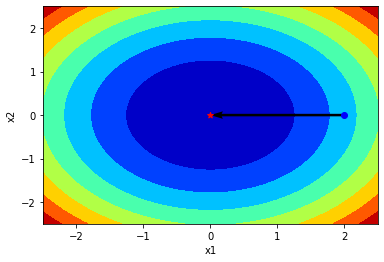

In [ ]:
A=np.array([[1,0],[0,1]])
contour_plot(A,iters_solutions_steepest[0])
print('Initial Value=',iters_solutions_steepest[0][0],',Value of Minima x*=',minima_solutions_steepest[0])
print('\nFunctional Value of  at minima=', f(A,minima_solutions_steepest[0]))


Initial Value= [2 2] ,Value of Minima x*= [0. 0.]

Functional Value of  at minima= 0.0


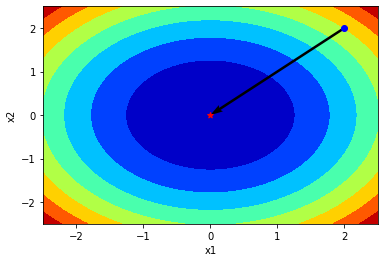

In [ ]:
A=np.array([[1,0],[0,1]])
contour_plot(A,iters_solutions_steepest[1])
print('Initial Value=',iters_solutions_steepest[1][0],',Value of Minima x*=',minima_solutions_steepest[1])
print('\nFunctional Value of  at minima=', f(A,minima_solutions_steepest[1]))


Initial Value= [2. 0.] ,Value of Minima x*= [0.00110825 0.00110825]

Functional Value of  at minima= 2.210802357911514e-05


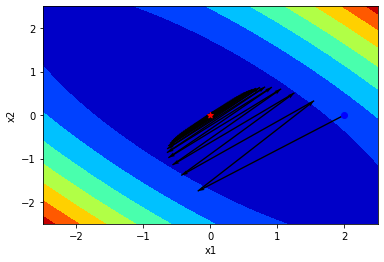

In [ ]:
A=np.array([[10,8],[8,10]])
contour_plot(A,iters_solutions_steepest[2])
print('Initial Value=',iters_solutions_steepest[2][0],',Value of Minima x*=',minima_solutions_steepest[2])
print('\nFunctional Value of  at minima=', f(A,minima_solutions_steepest[2]))


Initial Value= [2. 2.] ,Value of Minima x*= [0.00112236 0.00112236]

Functional Value of  at minima= 2.2674496486730302e-05


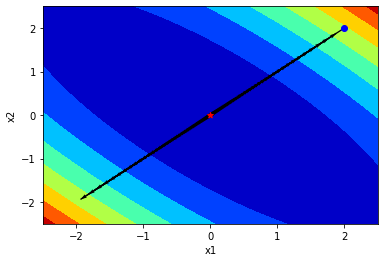

In [ ]:
A=np.array([[10,8],[8,10]])
contour_plot(A,iters_solutions_steepest[3])
print('Initial Value=',iters_solutions_steepest[3][0],',Value of Minima x*=',minima_solutions_steepest[3])
print('\nFunctional Value of  at minima=', f(A,minima_solutions_steepest[3]))


**Contour plot for Newton Method**

Initial Value= [2 0] ,Value of Minima x*= [0 0]

Functional Value of  at minima= 0.0


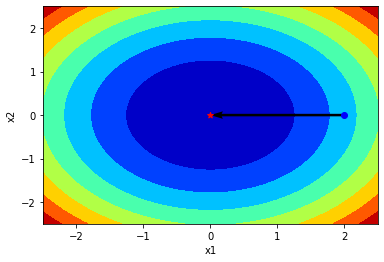

In [ ]:
A=np.array([[1,0],[0,1]])
contour_plot(A,iters_solutions_newton[0])
print('Initial Value=',iters_solutions_newton[0][0],',Value of Minima x*=',minima_solutions_newton[0])
print('\nFunctional Value of  at minima=', f(A,minima_solutions_newton[0]))


Initial Value= [2 2] ,Value of Minima x*= [0 0]

Functional Value of  at minima= 0.0


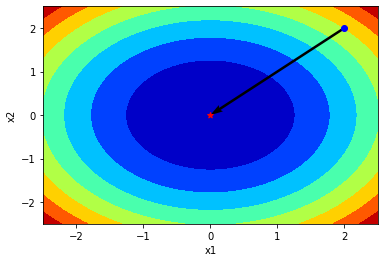

In [ ]:
A=np.array([[1,0],[0,1]])
contour_plot(A,iters_solutions_newton[1])
print('Initial Value=',iters_solutions_newton[1][0],',Value of Minima x*=',minima_solutions_newton[1])
print('\nFunctional Value of  at minima=', f(A,minima_solutions_newton[1]))


Initial Value= [2 0] ,Value of Minima x*= [0 0]

Functional Value of  at minima= 0.0


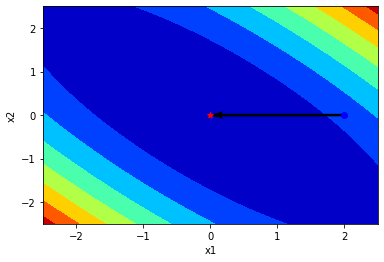

In [ ]:
A=np.array([[10,8],[8,10]])
contour_plot(A,iters_solutions_newton[2])
print('Initial Value=',iters_solutions_newton[2][0],',Value of Minima x*=',minima_solutions_newton[2])
print('\nFunctional Value of  at minima=', f(A,minima_solutions_newton[2]))


Initial Value= [2 2] ,Value of Minima x*= [0 0]

Functional Value of  at minima= 0.0


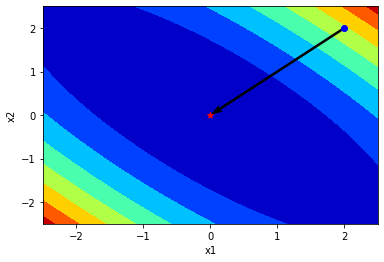

In [ ]:
A=np.array([[10,8],[8,10]])
contour_plot(A,iters_solutions_newton[3])
print('Initial Value=',iters_solutions_newton[3][0],',Value of Minima x*=',minima_solutions_newton[3])
print('\nFunctional Value of  at minima=', f(A,minima_solutions_newton[3]))


We see that,for $A_1$ both steepest descent and newton method converges to minima in one iteration.The eigenvalues for $A_1$ is $1,1$,hence condition number is also 1.This gives convergence in one iteration.\
$A_2$ has eigen value $10,8$ and has elliptic contour.Here due to larger condition number,the steepest Descent converge slowly. the newton method taking $α=1$ ,converges in one iteration.

# **Question : 3**

**Rosenbrock function**

Use the steepest descent and Newtons algorithms using the backtracking line search to minimize the classic Rosenbrock function. Set the initial step length to 1. At each iteration store the step lengths used by each method and make plots. Show the step lengths taken and iterates as plots. Do these for a start point of search $x_0 = [1.2, 1.2]^T$ and then for the starting point $x_0 = [-1.2, 1]^T$ **[1 Point]**

1. Plot the convergence of the iterates and the objective function value. Evaluate the rate of convergence. **[0.5 Points]**

2. Call built-in functions for steepest descent and newton’s method, and show the results for the above. Compare and evaluate your program. Compare the run-time of your program and built-in function. Is there a difference? Why or why not? **Hint**: Jacobians! **[1 Point]**

$f(x_0, x_1) = 100(x_1-x_0^2)^2 + 1(1-x_0)^2$



$ \nabla f(x_0,x_1) = \begin{bmatrix}
400x_0^3-400x_0x_1-2+2x_0\\
200(x_1-x_0^2)^2
\end{bmatrix}$
    
$H=\nabla^2 f = \begin{bmatrix}
1200x_0^2-400x_1+2 & -400x_0\\
-400x_0 &200
\end{bmatrix}$

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import time

In [55]:
def r_fx(x):    # The Rosenbrock Function and it's derivative
    return 100*((x[1] - (x[0]**2))**2) + (1-x[0])**2

def r_dfx0(x):
    return 400*(x[0]**3) - 400 * x[0] * x[1] - 2 + 2 * x[0]

def r_df2x0(x):
    return 1200 * (x[0] **2) - 400 * x[1] +2

def r_dfx1xo(x):
    return -400*x[0]

def r_dfx1(x):
    return 200*(x[1] - (x[0]**2))

def r_d2fx1(x):
    return 200

def r_dfx0x1(x):
    return -400*x[0]


In [56]:
def r_jacobian(x):
    return - np.array([r_dfx0(x), r_dfx1(x)] ).T
def r_hessian(x):
    return np.array([
    [r_df2x0(x), r_dfx1xo(x)],
    [r_dfx0x1(x), r_d2fx1(x)]])
def r_newton_direction(x):
    return np.matmul(np.linalg.inv(r_hessian(x)), r_jacobian(x))   

In [58]:
def r_optimal_step_length(x, step_length=1, c = 1, rho= 1e-4):
    direction = r_jacobian(x)
    current_f = r_fx(x)
    while True:
        next_x = x + step_length * direction
        next_f = r_fx(next_x)
        residual = c * step_length * np.matmul(- direction.T, direction) # Direction is -ve for steepest descent
        if next_f <= (current_f + residual): break
        step_length = step_length*rho
    return step_length
    

In [59]:
def r_line_search(x, step_length = 1, rho = 0.9, c = 1e-4, tolerence = 1e-10, method='Steepest Descent'):
    x_values = [x]
    while True:
        if method == 'Steepest Descent':
            direction = r_jacobian(x)
            opt_step_length = r_optimal_step_length(x, step_length, c, rho)
        else:
            direction = r_newton_direction(x)
            opt_step_length = 1
        next_x = x + opt_step_length * direction
        if np.square(np.linalg.norm(next_x-x, ord=2)) < tolerence: break
        x = next_x
        x_values.append(next_x)
    return np.array(x_values)

In [60]:
def process_line_search(x, **kargs):
    x = np.array(x)
   
    return r_line_search(x, **kargs)

In [61]:
def contour_value(x):    # contour plotting
    return 100*((x[1] - (x[0]**2))**2) + (1-x[0])**2

def plt_countour( iterates_solutions):
    
    x0 = np.linspace(-3, 3, 1000)
    x1 = np.linspace(-3, 3, 1000)
    xx0, xx1 = np.meshgrid(x0, x1)
    yval = r_fx(np.array([xx0, xx1]))    
    
    plt.figure(figsize = (10, 8))
    plt.xlabel('x0')
    plt.ylabel('x1')

    plt.contour(x0, x1, yval,cmap='jet' )
    plt.plot(x_values.T[0], x_values.T[1], "x-")

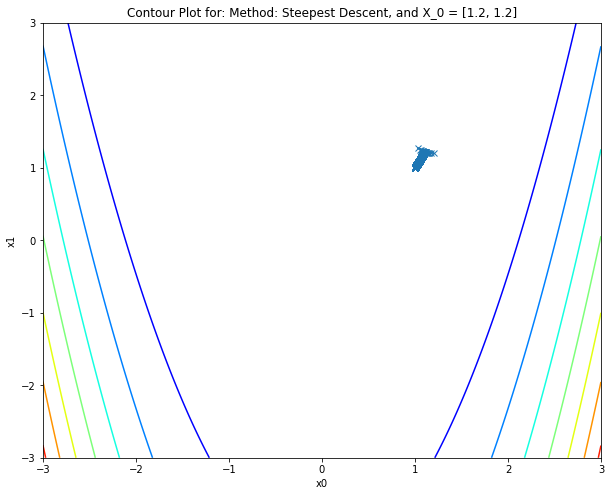

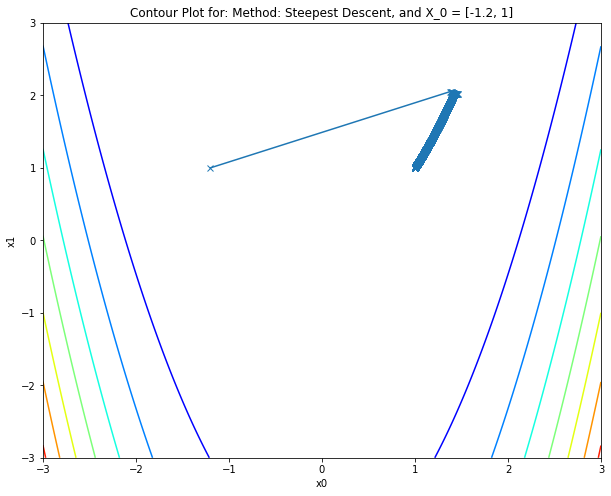

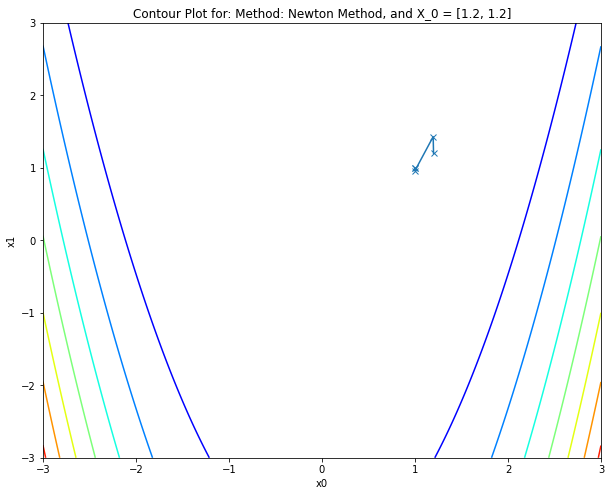

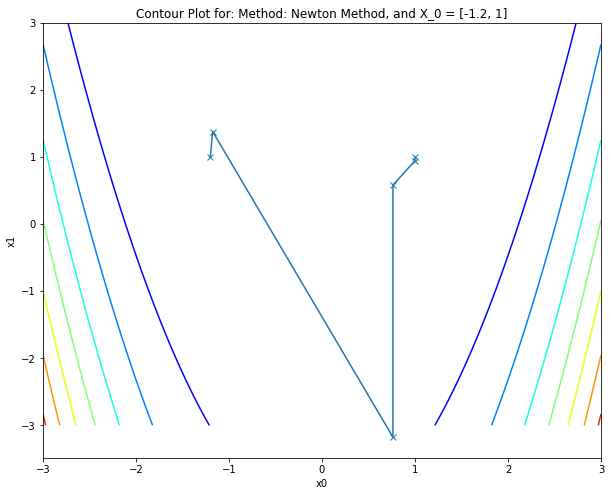

In [63]:
x_list = [              # initial values taken in a list
    [1.2, 1.2],
    [-1.2, 1]
]
out_list = []
for method in ['Steepest Descent', 'Newton Method']:
    for x in x_list:
        counter = time.time()
        x_values = process_line_search(x, method=method)
        elapsed_time = time.time() - counter
        out_list.append([
            method, x, ', '.join(str(_) for _ in list(x_values[-1])), len(x_values) -1, elapsed_time
        ])
        plt_countour( iterates_solutions = x_values)
        plt.title(f'Contour Plot for: Method: {method}, and X_0 = {x}')

In [64]:
pd.DataFrame(out_list, columns=['Method','X0', 'Optimal_X', 'No_Of_Iter', 'TimeTaken'])

,Method,X0,Optimal_X,No_Of_Iter,TimeTaken
0,Steepest Descent,"[1.2, 1.2]","1.0000878574517762, 1.000186820125475",9259,3.549127
1,Steepest Descent,"[-1.2, 1]","1.000094124476144, 1.000199830510625",12731,4.890722
2,Newton Method,"[1.2, 1.2]","1.000000000654484, 0.9999996704605626",4,0.001412
3,Newton Method,"[-1.2, 1]","0.99999569565363, 0.9999913913256393",5,0.000551


Now We will be using built in function for Steepest Descent 

In [66]:
from scipy import optimize
x_0=[1.2,1.2]

scipy.optimize.fmin(r_fx, x_0)



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 82


array([0.999993  , 0.99998474])

In [67]:
x_0=[-1.2,1]
scipy.optimize.fmin(r_fx, x_0)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 159


array([1.00002202, 1.00004222])

For Newton Method

In [68]:
x_0=[1.2,1.2]
scipy.optimize.newton(r_fx, x_0)


array([1.00000002, 1.00000002])

In [69]:
x_0=[-1.2,1]
scipy.optimize.newton(r_fx, x_0,maxiter=100000)

array([-0.52384781,  0.38531619])

In the Newton method,The inbuilt function uses secant method (approximated the derivative) and in our implementation we use Hessian matrix.So we get more accurate result than using inbuilt function.